## Load in Packages

In [32]:
suppressPackageStartupMessages({ 
    library(data.table) 
    library(dplyr) 
    library(ggplot2) 
    library(SingleCellExperiment)
    library(dplyr)
    library(celldex)
    library(SingleR)
    library(RColorBrewer)
    library(scater) 
    library(StabMap) 
    library(scran) 
    library(harmony) 
    library(patchwork)
    library(Seurat)
    library(plotly)
    library(Matrix)
    library(stringr)
    library(cowplot)
    library(pheatmap)
    library(viridis)
})

## Set Data Locations and Load in the Datasets

In [2]:
# set paths to data locations
io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2/"
# set the working directory
setwd(io$main)

# set paths to data locations for the query samples
#io$integrated_object = file.path(io$main, "projects/10_Axin_1_2/outputs/axin_object_integrated_e6_8_Original_Atlas.rds")

# load in the query data 
#integrated_object <- readRDS(io$integrated_object)

In [3]:
# set paths to data locations for the query samples
io$query = file.path(io$main, "projects/10_Axin_1_2/outputs/deprec/integrated_axin_dataset_seurat.rds")

# load in the query data 
query <- readRDS(io$query)

## Load in the Saved Meta.Data

In [4]:
# set paths to data locations for the query samples
io$integrated_axin_metadata = file.path(io$main, "projects/10_Axin_1_2/github_submission/code/Dev_Cell_Revisions/github_submissions/outputs/integrated_axin_metadata.rds")
io$axin_metadata = file.path(io$main, "projects/10_Axin_1_2/github_submission/code/Dev_Cell_Revisions/github_submissions/outputs/axin_metadata.rds")

# load in the query data 
integrated_axin_metadata <- readRDS(io$integrated_axin_metadata)
axin_metadata <- readRDS(io$axin_metadata)

## Load in the Cell Type Colours

In [5]:
source("projects/10_Axin_1_2/github_submission/code/Dev_Cell_Revisions/github_submissions/celltype_colours.r")

## SetUP the Seurat Object

In [6]:
query

An object of class Seurat 
29998 features across 10250 samples within 2 assays 
Active assay: across_genotype_integration (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [8]:
colnames(axin_metadata)

[1] "cell"                                      
 [2] "orig.ident"                                
 [3] "nCount_originalexp"                        
 [4] "nFeature_originalexp"                      
 [5] "sample"                                    
 [6] "embryo_version"                            
 [7] "stage"                                     
 [8] "somite_count"                              
 [9] "anatomy"                                   
[10] "S_score"                                   
[11] "G2M_score"                                 
[12] "phase"                                     
[13] "louvain"                                   
[14] "leiden"                                    
[15] "celltype_PijuanSala2019"                   
[16] "celltype_extended_atlas"                   
[17] "sizeFactor"                                
[18] "stage_updated"                             
[19] "within_timepoint_integration_snn_res.2"    
[20] "seurat_clusters"                           
[21] "originalexp_snn_res.2"                     
[22] "within_atlas_version_integration_snn_res.2"
[23] "nCount_within_timepoint_integration"       
[24] "nFeature_within_timepoint_integration"     
[25] "nCount_within_atlas_version_integration"   
[26] "nFeature_within_atlas_version_integration" 
[27] "nCount_RNA"                                
[28] "nFeature_RNA"                              
[29] "barcode"                                   
[30] "mitochondrial_percent_RNA"                 
[31] "ribosomal_percent_RNA"                     
[32] "idx"                                       
[33] "tdTom"                                     
[34] "tdTom_corr"                                
[35] "pass_rnaQC"                                
[36] "doublet_score"                             
[37] "doublet_call"                              
[38] "celltype.mapped_mnn"                       
[39] "celltype.score_mnn"                        
[40] "celltype_extended.mapped_mnn"              
[41] "celltype_extended.score_mnn"               
[42] "stage.mapped_mnn"                          
[43] "cellstage.score_mnn"                       
[44] "closest.cell_mnn"                          
[45] "genotype"                                  
[46] "RNA_snn_res.1"                             
[47] "across_genotype_integration_snn_res.1"     
[48] "dataset"                                   
[49] "integrated_clusters"                       
[50] "extended_atlas_label"                      
[51] "original_atlas_label"                      
[52] "stage_label"                               
[53] "integrated_clusters_character"             
[54] "integrated_clusters_updated"               
[55] "integrated_clusters_updated_ordered"       
[56] "iUMAP_1"                                   
[57] "iUMAP_2"                                   
[58] "UMAP_1"                                    
[59] "UMAP_2"

In [9]:
object <- AddMetaData(query, metadata = axin_metadata)

In [10]:
object

An object of class Seurat 
29998 features across 10250 samples within 2 assays 
Active assay: across_genotype_integration (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

## Find All Marker Genes

In [11]:
Idents(object) <- "integrated_clusters_updated_ordered"
DefaultAssay(object) <- "RNA"
markers <- FindAllMarkers(object,
                          assay = "RNA",
                          #features = rownames(object),
                          slot = "data")

Calculating cluster ExE Ectoderm

Calculating cluster ExE Endoderm

Calculating cluster Visceral Endoderm

Calculating cluster Parietal Endoderm

Calculating cluster Epiblast

Calculating cluster Primitive Streak

Calculating cluster Anterior Primitive Streak

Calculating cluster Nascent mesoderm #1

Calculating cluster Nascent mesoderm #2

Calculating cluster Haematoendothelial progenitors #1

Calculating cluster Haematoendothelial progenitors #2

Calculating cluster Posterior Lateral Plate Mesoderm

Calculating cluster Mesenchyme

Calculating cluster Posterior Primitive Streak

Calculating cluster Allantois Mesoderm

Calculating cluster Intermediate Mesoderm

Calculating cluster Low Quality



In [12]:
# Set the output CSV file path
csv_output_filepath <- "projects/10_Axin_1_2/github_submission/code/Dev_Cell_Revisions/github_submissions/outputs/integrated_clusters_updated_markers.csv"
write.csv(markers, file = csv_output_filepath, row.names = TRUE)

In [138]:
object

An object of class Seurat 
29998 features across 9970 samples within 2 assays 
Active assay: RNA (27998 features, 0 variable features)
 1 other assay present: across_genotype_integration
 2 dimensional reductions calculated: pca, umap

In [139]:
colnames(object@meta.data)

[1] "orig.ident"                           
 [2] "nCount_RNA"                           
 [3] "nFeature_RNA"                         
 [4] "barcode"                              
 [5] "sample"                               
 [6] "cell"                                 
 [7] "mitochondrial_percent_RNA"            
 [8] "ribosomal_percent_RNA"                
 [9] "idx"                                  
[10] "stage"                                
[11] "tdTom"                                
[12] "tdTom_corr"                           
[13] "pass_rnaQC"                           
[14] "doublet_score"                        
[15] "doublet_call"                         
[16] "celltype.mapped_mnn"                  
[17] "celltype.score_mnn"                   
[18] "celltype_extended.mapped_mnn"         
[19] "celltype_extended.score_mnn"          
[20] "stage.mapped_mnn"                     
[21] "cellstage.score_mnn"                  
[22] "closest.cell_mnn"                     
[23] "genotype"                             
[24] "RNA_snn_res.1"                        
[25] "seurat_clusters"                      
[26] "across_genotype_integration_snn_res.1"
[27] "extended_celltype"                    
[28] "extended_celltype_mappingscore"       
[29] "original_celltype"                    
[30] "original_celltype_mappingscore"       
[31] "stage_mappingscore"                   
[32] "anatomy"                              
[33] "anatomy_mappingscore"                 
[34] "integrated_clusters"                  
[35] "seurat_clusters_updated"              
[36] "integrated_clusters_character"        
[37] "integrated_clusters_updated"          
[38] "integrated_clusters_updated_ordered"

In [140]:
Idents(object) <- "integrated_clusters_updated_ordered"

In [141]:
object$genotype <- factor(object$genotype, levels = c("wildtype", "mutant"))

## WRITE A FUNCTION TO FIND CONSERVED MARKER GENES
find_conserved_markers <- function(ident, object) {
  DefaultAssay(object) <- "RNA"
  conserved_markers <- FindConservedMarkers(
    object = object,
    ident.1 = ident,
    assay = "RNA",
    features = rownames(object),
    grouping.var = "genotype"
  )
  return(conserved_markers)
}

## USAGE of the FUNCTION
Nascent_Mesoderm_1_conserved <- find_conserved_markers("Nascent mesoderm #1", object = object)
Nascent_Mesoderm_1_conserved$cluster <- "Nascent_Mesoderm_1"
Nascent_Mesoderm_2_conserved <- find_conserved_markers("Nascent mesoderm #2", object = object)
Nascent_Mesoderm_2_conserved$cluster <- "Nascent_Mesoderm_2"
Posterior_PS_markers_conserved <- find_conserved_markers("Posterior Primitive Streak", object = object)
Posterior_PS_markers_conserved$cluster <- "Posterior_PS"

Testing group mutant: (Nascent mesoderm #1) vs (Allantois Mesoderm, Posterior Lateral Plate Mesoderm, ExE Endoderm, Visceral Endoderm, ExE Ectoderm, Haematoendothelial progenitors #2, Posterior Primitive Streak, Nascent mesoderm #2, Haematoendothelial progenitors #1, Mesenchyme, Epiblast, Parietal Endoderm, Intermediate Mesoderm, Low Quality, Primitive Streak, Anterior Primitive Streak)

Testing group wildtype: (Nascent mesoderm #1) vs (Primitive Streak, ExE Endoderm, Epiblast, ExE Ectoderm, Anterior Primitive Streak, Visceral Endoderm, Posterior Primitive Streak, Nascent mesoderm #2, Parietal Endoderm, Haematoendothelial progenitors #1, Low Quality, Allantois Mesoderm)

Testing group mutant: (Nascent mesoderm #2) vs (Allantois Mesoderm, Posterior Lateral Plate Mesoderm, ExE Endoderm, Visceral Endoderm, ExE Ectoderm, Haematoendothelial progenitors #2, Nascent mesoderm #1, Posterior Primitive Streak, Haematoendothelial progenitors #1, Mesenchyme, Epiblast, Parietal Endoderm, Intermediat

In [142]:
# Set the output CSV file path
csv_output_filepath <- "projects/10_Axin_1_2/results/Nascent_Mesoderm_1_conserved.csv"
write.csv(Nascent_Mesoderm_1_conserved, file = csv_output_filepath, row.names = TRUE)

# Set the output CSV file path
csv_output_filepath <- "projects/10_Axin_1_2/results/Nascent_Mesoderm_2_conserved.csv"
write.csv(Nascent_Mesoderm_2_conserved, file = csv_output_filepath, row.names = TRUE)

# Set the output CSV file path
csv_output_filepath <- "projects/10_Axin_1_2/results/Posterior_PS_markers_conserved.csv"
write.csv(Posterior_PS_markers_conserved, file = csv_output_filepath, row.names = TRUE)

In [143]:
Nascent_Mesoderm_1_conserved$gene <- row.names(Nascent_Mesoderm_1_conserved)
Nascent_Mesoderm_2_conserved$gene <- row.names(Nascent_Mesoderm_2_conserved)
Posterior_PS_markers_conserved$gene <- row.names(Posterior_PS_markers_conserved)

In [144]:
head(Nascent_Mesoderm_1_conserved)
head(Nascent_Mesoderm_2_conserved)
head(Posterior_PS_markers_conserved)

,mutant_p_val,mutant_avg_log2FC,mutant_pct.1,mutant_pct.2,mutant_p_val_adj,wildtype_p_val,wildtype_avg_log2FC,wildtype_pct.1,wildtype_pct.2,wildtype_p_val_adj,max_pval,minimump_p_val,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Lefty2,0.000000e+00,1.2894078,0.898,0.092,0.000000e+00,0.000000e+00,1.0139142,0.772,0.060,0.000000e+00,0.000000e+00,0.000000e+00,Nascent_Mesoderm_1,Lefty2
Rimbp2,0.000000e+00,0.4426179,0.668,0.033,0.000000e+00,8.740685e-249,0.3005829,0.400,0.021,2.447217e-244,8.740685e-249,0.000000e+00,Nascent_Mesoderm_1,Rimbp2
Tdgf1,0.000000e+00,1.1410409,0.972,0.104,0.000000e+00,1.397883e-207,1.0202922,1.000,0.466,3.913793e-203,1.397883e-207,0.000000e+00,Nascent_Mesoderm_1,Tdgf1
Mesp1,6.293368e-282,1.2141213,0.884,0.156,1.762017e-277,0.000000e+00,1.5995314,1.000,0.138,0.000000e+00,6.293368e-282,0.000000e+00,Nascent_Mesoderm_1,Mesp1
Cdh11,6.294489e-132,0.7117389,0.986,0.397,1.762331e-127,0.000000e+00,0.8024200,0.850,0.093,0.000000e+00,6.294489e-132,0.000000e+00,Nascent_Mesoderm_1,Cdh11
Frzb,7.733889e-305,0.8922057,0.972,0.200,2.165334e-300,3.008734e-271,0.5776676,0.750,0.100,8.423852e-267,3.008734e-271,1.546778e-304,Nascent_Mesoderm_1,Frzb


,mutant_p_val,mutant_avg_log2FC,mutant_pct.1,mutant_pct.2,mutant_p_val_adj,wildtype_p_val,wildtype_avg_log2FC,wildtype_pct.1,wildtype_pct.2,wildtype_p_val_adj,max_pval,minimump_p_val,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Kdr,4.193650e-150,0.5919124,0.853,0.196,1.174138e-145,0.000000e+00,0.6090468,0.682,0.035,0.000000e+00,4.193650e-150,0.000000e+00,Nascent_Mesoderm_2,Kdr
Foxf1,1.263004e-85,0.4355691,0.836,0.271,3.536160e-81,1.400268e-274,0.3001340,0.359,0.007,3.920470e-270,1.263004e-85,2.800536e-274,Nascent_Mesoderm_2,Foxf1
Mesp1,3.870379e-45,0.2985332,0.563,0.191,1.083629e-40,5.350390e-225,1.5035607,1.000,0.164,1.498002e-220,3.870379e-45,1.070078e-224,Nascent_Mesoderm_2,Mesp1
Lmo1,1.070442e-167,0.8154021,0.932,0.249,2.997025e-163,1.870191e-218,0.5949861,0.626,0.051,5.236162e-214,1.070442e-167,3.740383e-218,Nascent_Mesoderm_2,Lmo1
Cacna1c,8.251688e-57,0.3072636,0.573,0.185,2.310308e-52,6.899850e-198,0.5228811,0.596,0.052,1.931820e-193,8.251688e-57,1.379970e-197,Nascent_Mesoderm_2,Cacna1c
Cdh11,1.483832e-111,0.7190758,0.990,0.406,4.154433e-107,1.668209e-196,0.7382754,0.848,0.116,4.670653e-192,1.483832e-111,3.336419e-196,Nascent_Mesoderm_2,Cdh11


,mutant_p_val,mutant_avg_log2FC,mutant_pct.1,mutant_pct.2,mutant_p_val_adj,wildtype_p_val,wildtype_avg_log2FC,wildtype_pct.1,wildtype_pct.2,wildtype_p_val_adj,max_pval,minimump_p_val,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Ifitm3,6.127552e-52,0.6117453,0.714,0.141,1.715592e-47,3.086401e-78,0.8847075,0.896,0.219,8.641306e-74,6.127552e-52,6.172803e-78,Posterior_PS,Ifitm3
T,8.980646e-40,0.9350429,0.948,0.442,2.514401e-35,1.086748e-58,0.8195883,0.792,0.198,3.042677e-54,8.980646e-40,2.173496e-58,Posterior_PS,T
Ifitm1,1.107060e-27,0.7674543,1.000,0.604,3.099545e-23,2.315509e-51,0.8193035,0.896,0.284,6.482962e-47,1.107060e-27,4.631018e-51,Posterior_PS,Ifitm1
Psme2,5.369731e-23,0.5702376,0.883,0.587,1.503417e-18,3.423357e-51,0.7855184,0.990,0.669,9.584716e-47,5.369731e-23,6.846715e-51,Posterior_PS,Psme2
Rnf213,1.146788e-24,0.3141933,0.494,0.123,3.210777e-20,2.214740e-50,0.2636707,0.354,0.040,6.200829e-46,1.146788e-24,4.429480e-50,Posterior_PS,Rnf213
Pdgfa,2.348099e-19,0.4758374,0.844,0.440,6.574206e-15,7.106271e-43,0.5719114,0.740,0.215,1.989614e-38,2.348099e-19,1.421254e-42,Posterior_PS,Pdgfa


In [145]:
combinded_conserved_markers <- rbind(Nascent_Mesoderm_1_conserved, Nascent_Mesoderm_2_conserved, Posterior_PS_markers_conserved)

In [146]:
combinded_conserved_markers %>%
    group_by(cluster) %>%
    dplyr::filter(mutant_avg_log2FC > 0.5 & wildtype_avg_log2FC > 0.5) %>%
    slice_head(n = 5) %>%
    ungroup() -> top_conserved_markers_up

combinded_conserved_markers %>%
    group_by(cluster) %>%
    dplyr::filter(mutant_avg_log2FC < 0.5 & wildtype_avg_log2FC < 0.5) %>%
    slice_head(n = 5) %>%
    ungroup() -> top_conserved_markers_down

## DEG

In [15]:
object$integrated_clusters_updated_genotype <- paste0(object$integrated_clusters_updated_ordered, " (", object$genotype, ")")

In [16]:
table(object$integrated_clusters_updated_genotype, object$genotype)

                                              
                                               mutant wildtype
  Allantois Mesoderm (mutant)                     506        0
  Allantois Mesoderm (wildtype)                     0       17
  Anterior Primitive Streak (mutant)                1        0
  Anterior Primitive Streak (wildtype)              0      157
  Epiblast (mutant)                                14        0
  Epiblast (wildtype)                               0     1582
  ExE Ectoderm (mutant)                           661        0
  ExE Ectoderm (wildtype)                           0      713
  ExE Endoderm (mutant)                           964        0
  ExE Endoderm (wildtype)                           0     1187
  Haematoendothelial progenitors #1 (mutant)       60        0
  Haematoendothelial progenitors #1 (wildtype)      0       28
  Haematoendothelial progenitors #2 (mutant)      169        0
  Intermediate Mesoderm (mutant)                   71        0
  Low Qu

In [17]:
Idents(object) <- "integrated_clusters_updated_genotype"
## WRITE A FUNCTION TO FIND DEG  
find_DEG <- function(mt_celltype, wt_celltype, object) {
  DefaultAssay(object) <- "RNA"
  DEG <- FindMarkers(
    object = object,
    ident.1 = mt_celltype,
    ident.2 = wt_celltype,
    verbose = FALSE
  )
  return(DEG)
}

## USAGE of the FUNCTION
Nascent_Mesoderm_1_DEG <- find_DEG(mt_celltype = 'Nascent mesoderm #1 (mutant)',
                                 wt_celltype = 'Nascent mesoderm #1 (wildtype)',
                                 object = object)
Nascent_Mesoderm_1_DEG$cluster <- "Nascent_Mesoderm_1"

Nascent_Mesoderm_2_DEG <- find_DEG(mt_celltype = 'Nascent mesoderm #2 (mutant)',
                                 wt_celltype = 'Nascent mesoderm #2 (wildtype)',
                                 object = object)
Nascent_Mesoderm_2_DEG$cluster <- "Nascent_Mesoderm_2"

Posterior_PS_DEG <- find_DEG(mt_celltype = 'Posterior Primitive Streak (mutant)',
                                 wt_celltype = 'Posterior Primitive Streak (wildtype)',
                                 object = object)
Posterior_PS_DEG$cluster <- "Posterior Primitive Streak"

In [18]:
Nascent_Mesoderm_1_DEG$gene <- row.names(Nascent_Mesoderm_1_DEG)
Nascent_Mesoderm_2_DEG$gene <- row.names(Nascent_Mesoderm_2_DEG)
Posterior_PS_DEG$gene <- row.names(Posterior_PS_DEG)

In [19]:
combinded_DEG <- rbind(Nascent_Mesoderm_1_DEG, Nascent_Mesoderm_2_DEG, Posterior_PS_DEG)

In [20]:
head(combinded_DEG)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Gm10260,1.445795e-135,-1.4981128,0.011,0.997,4.047936e-131,Nascent_Mesoderm_1,Gm10260
Dkk1,1.897268e-115,1.1395590,0.978,0.210,5.311972e-111,Nascent_Mesoderm_1,Dkk1
Rps18-ps3,1.031885e-103,-0.8069930,0.030,0.848,2.889070e-99,Nascent_Mesoderm_1,Rps18-ps3
Gm10073,2.035410e-101,0.5415652,1.000,0.901,5.698742e-97,Nascent_Mesoderm_1,Gm10073
Uba52,4.603204e-99,0.5027321,1.000,0.925,1.288805e-94,Nascent_Mesoderm_1,Uba52
Axin2,3.377085e-91,0.7028272,0.983,0.494,9.455162e-87,Nascent_Mesoderm_1,Axin2


In [21]:
combinded_DEG %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 0.5) %>%
    slice_head(n = 15) %>%
    ungroup() -> top_DEG_up

combinded_DEG %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC < 0.5) %>%
    slice_head(n = 15) %>%
    ungroup() -> top_DEG_down

In [154]:
unique(top_DEG_up$gene)
unique(top_DEG_down$gene)

[1] "Dkk1"     "Gm10073"  "Uba52"    "Axin2"    "Hoxb1"    "Lmo2"    
 [7] "Nkd1"     "Ptprm"    "Mid1"     "Nrp1"     "Phlda2"   "Epb41l2" 
[13] "Lmo1"     "Cwc22"    "Tnfrsf19" "Prtg"     "Aplp2"    "Bmp4"    
[19] "Unc5c"    "Lgi2"     "Olfm1"    "Cdx1"     "Mllt3"    "Cmtm7"   
[25] "Grsf1"    "Sct"      "Klf5"     "Notum"    "Peg10"    "Cdx2"    
[31] "Prkd1"    "Crabp1"   "Cdx4"

[1] "Gm10260"   "Rps18-ps3" "Rpl23a"    "Rbms1"     "Prtg"      "Gpc3"     
 [7] "Peg3"      "Tdgf1"     "Fn1"       "Car2"      "Aplp2"     "Mixl1"    
[13] "Bmp7"      "Car4"      "Fgfr1"     "Mesp1"     "Uba52"     "Aldoa"    
[19] "Id1"       "Emb"       "Srm"       "Map4k4"    "Lect1"     "Lhx1"     
[25] "Mif"       "Gapdh"     "Gm10073"   "L1td1"     "Chchd10"   "Ldha"     
[31] "Fabp5"     "Bex4"      "Hspd1"     "Pou5f1"    "Dctpp1"    "Phgdh"

In [23]:
# Set the output CSV file path
csv_output_filepath <- "projects/10_Axin_1_2/github_submission/code/Dev_Cell_Revisions/github_submissions/outputs/DEG.csv"
write.csv(combinded_DEG, file = csv_output_filepath, row.names = TRUE)

## Plot DEG in Heatmap

In [24]:
object <- ScaleData(object)

Centering and scaling data matrix



In [25]:
DEG_object <- object[,object@meta.data$integrated_clusters_updated_ordered %in% c("Nascent mesoderm #1", 
                                                                                  "Nascent mesoderm #2", 
                                                                                  "Posterior Primitive Streak"
                                                                                  #"ExE Ectoderm", 
                                                                                  #"ExE Endoderm", 
                                                                                  #"Visceral Endoderm"
                                                                                 )]

In [26]:
DEG_object <- ScaleData(DEG_object)

Centering and scaling data matrix



In [34]:
Hernandez_dataset_colors

Gastrulation Atlas       Axin Control           Axin DKO 
         "#B0B0B0"          "#55BCC2"          "#E87D72"

In [40]:
head(heatmap_matrix)

,Xkr4,Gm1992,Gm37381,Rp1,Rp1.1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
LibA_DKOAxin1Axin2_E6_1_IGO_14590_1#AAAGAACAGTGGACTG-1,1.393987,-0.06100504,-0.02680281,-0.0944877,0,-0.1925123,0,-0.6590844,1.8282392,-0.3096679,...,0,0,0,0,0,0,-0.6630481,-0.5233934,0,-0.1382275
LibA_DKOAxin1Axin2_E6_1_IGO_14590_1#AAAGGGCTCTCAACCC-1,-0.371435,-0.06100504,-0.02680281,-0.0944877,0,-0.1925123,0,-0.1373500,-0.6467346,-0.3096679,...,0,0,0,0,0,0,0.6645668,1.2260508,0,-0.1382275
LibA_DKOAxin1Axin2_E6_1_IGO_14590_1#AAAGGTACAGGACAGT-1,1.761854,-0.06100504,-0.02680281,-0.0944877,0,-0.1925123,0,1.0455093,-0.6467346,3.1217559,...,0,0,0,0,0,0,-0.6630481,-0.5233934,0,-0.1382275
LibA_DKOAxin1Axin2_E6_1_IGO_14590_1#AAAGGTATCTGCTAGA-1,-0.371435,-0.06100504,-0.02680281,-0.0944877,0,-0.1925123,0,-0.7603915,-0.6467346,-0.3096679,...,0,0,0,0,0,0,-0.6630481,4.0805037,0,-0.1382275
LibA_DKOAxin1Axin2_E6_1_IGO_14590_1#AAAGTGAAGCACTCGC-1,-0.371435,-0.06100504,-0.02680281,-0.0944877,0,-0.1925123,0,0.1340978,1.0248197,-0.3096679,...,0,0,0,0,0,0,-0.6630481,-0.5233934,0,-0.1382275
LibA_DKOAxin1Axin2_E6_1_IGO_14590_1#AAAGTGACACAGTCGC-1,-0.371435,-0.06100504,-0.02680281,-0.0944877,0,-0.1925123,0,-0.1774147,2.6058244,3.5698438,...,0,0,0,0,0,0,1.1429345,-0.5233934,0,-0.1382275


In [35]:
heatmap_matrix <- t(DEG_object@assays$RNA@scale.data)
heatmap_filtered <- heatmap_matrix[,unique(c(top_DEG_up$gene, top_DEG_down$gene))]

# list the colours for the annotations in the heatmap
my_colour = list(
   dataset = Hernandez_dataset_colors,
   integrated_clusters_updated_ordered = Hernandez_colors_filtered
   )

subsetted_sorted_meta <- subset(DEG_object@meta.data, select = c(dataset, integrated_clusters_updated_ordered))

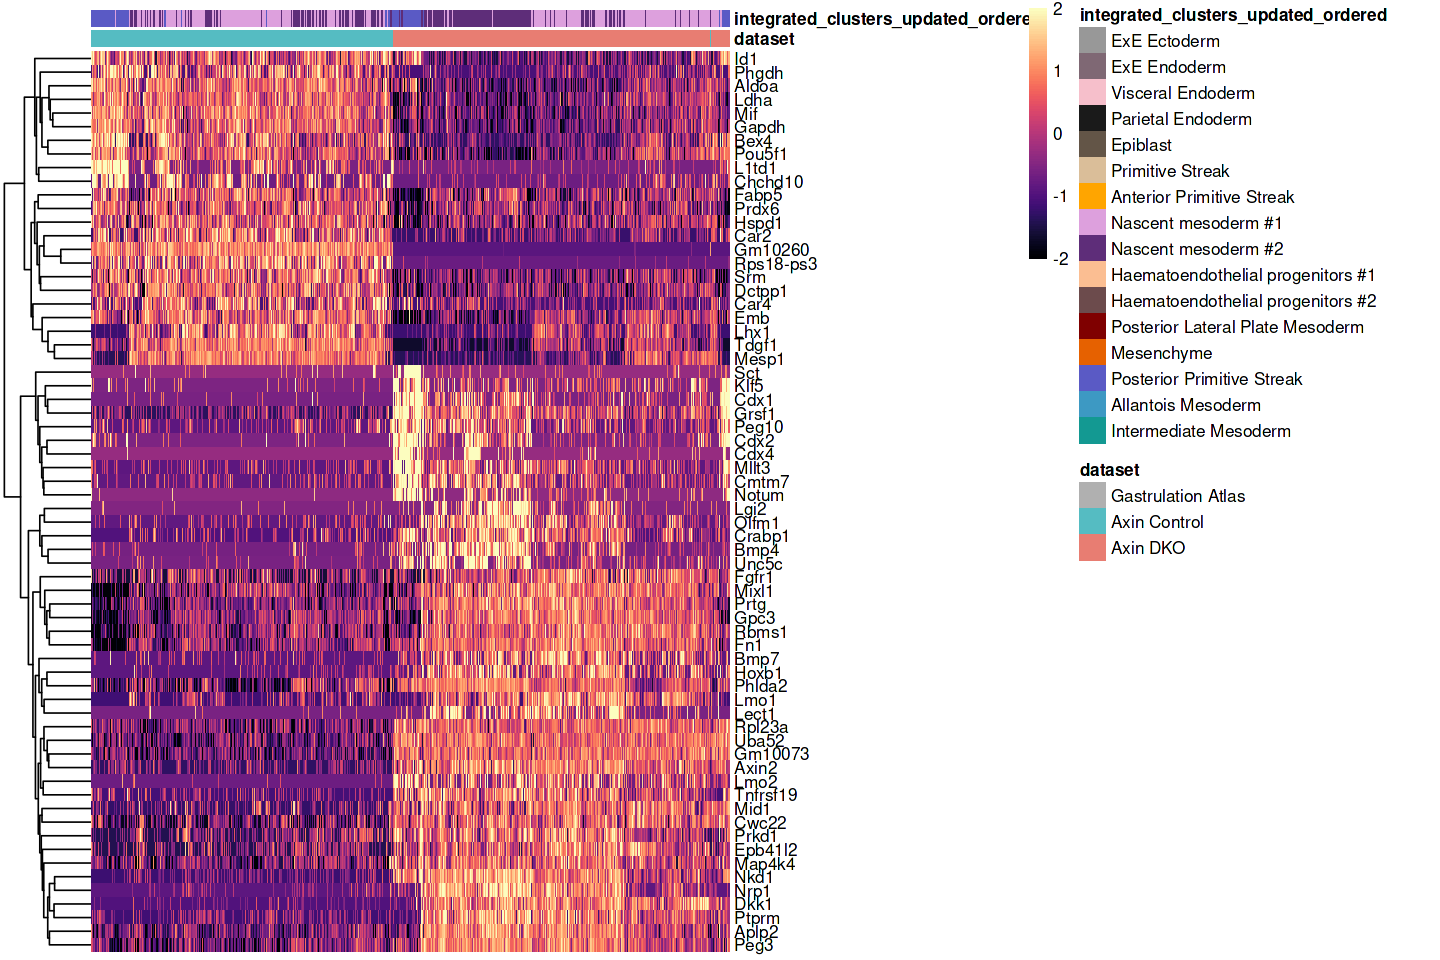

In [36]:
options(repr.plot.width=12, repr.plot.height=8)
min_limit <- -2
max_limit <- 2
pheatmap(t(heatmap_filtered),
        annotation_col=subsetted_sorted_meta,
        annotation_colors = my_colour,
        scale = "none",
        cluster_rows = TRUE,  
        cluster_cols = TRUE,  
        color = magma(100),
        show_colnames = FALSE,
        show_rownames = TRUE,
        breaks = seq(min_limit, max_limit, length.out = 101),
        treeheight_col = 0,
        legend_labels = NULL)

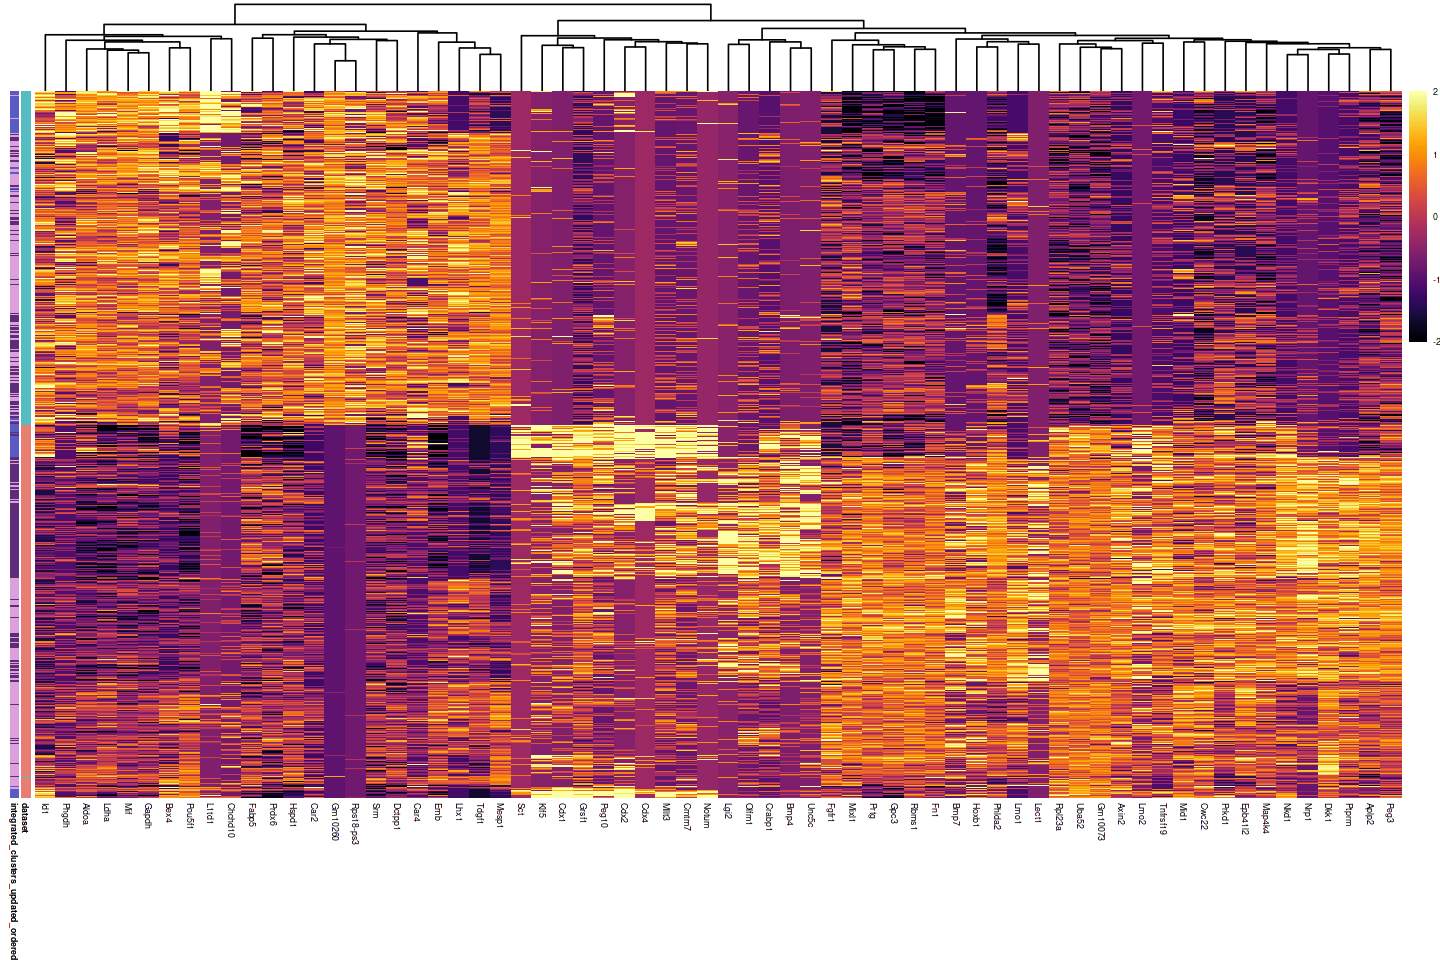

In [37]:
options(repr.plot.width=12, repr.plot.height=8)
min_limit <- -2
max_limit <- 2
heatmap <- pheatmap(heatmap_filtered,
        annotation_row=subsetted_sorted_meta,
        annotation_colors = my_colour,
        scale = "none",
        cluster_rows = TRUE,  
        cluster_cols = TRUE,  
        color = inferno(100),
        show_colnames = TRUE,
        show_rownames = FALSE,
        breaks = seq(min_limit, max_limit, length.out = 101),
        treeheight_row = 0,
        legend_labels = FALSE,
        legend = TRUE,
        annotation_legend = FALSE,
        fontsize = 5,
        use_raster = TRUE)

width <- 100
height <- 100

# Save the grid plot as .svg file to specific file path
file_name <- paste0(csv_output_filepath,"heatmap_DEG_NM_PPS.pdf")
ggsave(filename = file_name, plot = heatmap, device = "pdf",
      units = "mm",
      width = width,
      height = height,
      scale = 1)

In [41]:
loadedNamespaces()

[1] "utf8"                   "reticulate"             "tidyselect"            
  [4] "RSQLite"                "AnnotationDbi"          "htmlwidgets"           
  [7] "grid"                   "BiocParallel"           "Rtsne"                 
 [10] "munsell"                "ScaledMatrix"           "ragg"                  
 [13] "codetools"              "ica"                    "StabMap"               
 [16] "statmod"                "scran"                  "pbdZMQ"                
 [19] "future"                 "miniUI"                 "withr"                 
 [22] "spatstat.random"        "colorspace"             "progressr"             
 [25] "Biobase"                "filelock"               "uuid"                  
 [28] "Seurat"                 "stats4"                 "SingleCellExperiment"  
 [31] "ROCR"                   "tensor"                 "listenv"               
 [34] "MatrixGenerics"         "repr"                   "GenomeInfoDbData"      
 [37] "harmony"                "polyclip"               "stats"                 
 [40] "farver"                 "pheatmap"               "bit64"                 
 [43] "parallelly"             "vctrs"                  "generics"              
 [46] "BiocFileCache"          "R6"                     "GenomeInfoDb"          
 [49] "ggbeeswarm"             "rsvd"                   "locfit"                
 [52] "bitops"                 "spatstat.utils"         "cachem"                
 [55] "DelayedArray"           "promises"               "scales"                
 [58] "rgeos"                  "beeswarm"               "gtable"                
 [61] "beachmat"               "Cairo"                  "globals"               
 [64] "goftest"                "rlang"                  "utils"                 
 [67] "methods"                "systemfonts"            "splines"               
 [70] "lazyeval"               "spatstat.geom"          "BiocManager"           
 [73] "yaml"                   "reshape2"               "abind"                 
 [76] "httpuv"                 "base"                   "tools"                 
 [79] "ggplot2"                "ellipsis"               "spatstat.core"         
 [82] "RColorBrewer"           "BiocGenerics"           "ggridges"              
 [85] "Rcpp"                   "plyr"                   "base64enc"             
 [88] "sparseMatrixStats"      "zlibbioc"               "purrr"                 
 [91] "RCurl"                  "rpart"                  "deldir"                
 [94] "pbapply"                "viridis"                "cowplot"               
 [97] "S4Vectors"              "zoo"                    "SeuratObject"          
[100] "SummarizedExperiment"   "ggrepel"                "cluster"               
[103] "magrittr"               "data.table"             "scattermore"           
[106] "lmtest"                 "RANN"                   "fitdistrplus"          
[109] "matrixStats"            "patchwork"              "mime"                  
[112] "evaluate"               "xtable"                 "IRanges"               
[115] "gridExtra"              "compiler"               "scater"                
[118] "tibble"                 "KernSmooth"             "crayon"                
[121] "htmltools"              "mgcv"                   "later"                 
[124] "tidyr"                  "DBI"                    "ExperimentHub"         
[127] "dbplyr"                 "MASS"                   "rappdirs"              
[130] "Matrix"                 "cli"                    "datasets"              
[133] "grDevices"              "parallel"               "metapod"               
[136] "igraph"                 "GenomicRanges"          "pkgconfig"             
[139] "sp"                     "IRdisplay"              "plotly"                
[142] "scuttle"                "spatstat.sparse"        "vipor"                 
[145] "dqrng"                  "XVector"                "graphics"              
[148] "stringr"                "d

In [42]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] viridis_0.6.2               viridisLite_0.4.1          
 [3] pheatmap_1.0.12             cowplot_1.1.1              
 [5] stringr_1.5.0               Matrix_1.5-1               
 [7] plotly_4.10.0               sp_1.5-0                   
 [9] SeuratObject_4.1.2          Seurat_4.2.0               
[11] patchwork_1.1.2         